In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from time import time
import warnings
warnings.filterwarnings("ignore")

/Users/y0p00uk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv(r"/Users/y0p00uk/Documents/filter.csv", parse_dates = [0], date_parser=parser)
df

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90
...,...,...
138,2012-09-28,18947.81
139,2012-10-05,21904.47
140,2012-10-12,22764.01
141,2012-10-19,24185.27


In [3]:
x = df.Weekly_Sales
x.size

143

In [4]:
train = x[:100]
test = x[100:]

In [5]:
test.dtypes

dtype('float64')

2078.9242923101474
[23288.0365058  23249.7710843  23226.04828132 23210.93021137
 23200.90348244 23193.88925296 23188.65749157 23184.48040007
 23180.92734701 23177.74353172 23174.77819101 23171.9421197
 23169.18253589 23166.46820903 23163.78066028 23161.10895591
 23158.44662649 23155.78984416 23153.13634399 23150.48478583
 23147.83437675 23145.18464757 23142.53532068 23139.88623182
 23137.2372838  23134.58841911 23131.93960373 23129.29081753
 23126.64204859 23123.99328986 23121.34453718 23118.69578807
 23116.04704108 23113.39829534 23110.74955034 23108.10080578
 23105.45206148 23102.80331733 23100.15457327 23097.50582927
 23094.8570853  23092.20834135 23089.55959741]


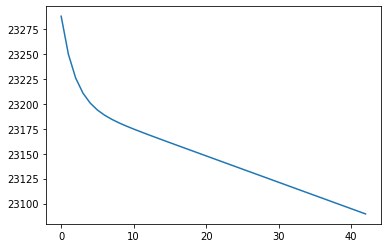

In [23]:
model_arima = ARIMA(train, order = (1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
prediction1 = model_arima_fit.forecast(steps = 43)[0]
print(prediction1)
plt.plot(prediction1)

In [24]:
z= (prediction1 - test)

In [7]:
df1 = pd.DataFrame(data=prediction1,columns = ['forecasted'])

In [9]:
df2 = pd.DataFrame(data=test,columns = ['test'])

In [10]:
df1

,forecasted
0,23288.036506
1,23249.771084
2,23226.048281
3,23210.930211
4,23200.903482
5,23193.889253
6,23188.657492
7,23184.480400
8,23180.927347
9,23177.743532


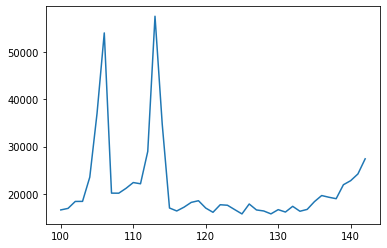

In [21]:
plt.plot(test)

In [26]:
error=(abs(prediction1-test)/((abs(prediction1) + abs(test))/2))*100
error

100    33.723367
101    31.662734
102    23.374917
103    23.240567
104     1.325529
105    45.842657
106    79.927350
107    14.132312
108    14.172404
109     9.195731
110     3.547952
111     4.700753
112    22.192827
113    85.255705
114    39.830007
115    30.818810
116    34.480021
117    29.815724
118    24.149361
119    22.236077
120    30.835557
121    36.111058
122    26.840146
123    27.426259
124    32.706671
125    38.148547
126    25.923719
127    33.067303
128    34.343930
129    38.053174
130    32.669640
131    35.672898
132    28.607230
133    34.654991
134    32.321436
135    23.102469
136    16.334717
137    18.186125
138    19.750514
139     5.302149
140     1.442893
141     4.624027
142    17.041279
Name: Weekly_Sales, dtype: float64

In [28]:
error.mean()

27.134686937096692